In [58]:
#Installing libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [59]:
#Load Data
from google.colab import files
uploaded = files.upload()

Saving RELIANCEBO.csv to RELIANCEBO (3).csv


In [61]:
#storing data into a data frame
df = pd.read_csv('RELIANCEBO.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,16-11-2016,494.649994,498.350006,491.000000,492.924988,480.389679,693016
1,17-11-2016,493.500000,499.000000,487.924988,490.649994,478.172516,837840
2,18-11-2016,491.575012,496.075012,491.450012,493.750000,481.193695,577712
3,21-11-2016,494.000000,496.850006,491.750000,495.450012,482.850464,725620
4,22-11-2016,497.125000,503.750000,497.024994,500.549988,487.820740,266052
5,23-11-2016,502.500000,504.250000,499.750000,503.625000,490.817535,250212


In [62]:
df = pd.read_csv('RELIANCEBO.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,16-11-2016,494.649994,498.350006,491.000000,492.924988,480.389679,693016
1,17-11-2016,493.500000,499.000000,487.924988,490.649994,478.172516,837840
2,18-11-2016,491.575012,496.075012,491.450012,493.750000,481.193695,577712
3,21-11-2016,494.000000,496.850006,491.750000,495.450012,482.850464,725620
4,22-11-2016,497.125000,503.750000,497.024994,500.549988,487.820740,266052
...,...,...,...,...,...,...,...
1231,09-11-2021,2502.000000,2528.949951,2486.699951,2520.050049,2520.050049,282251
1232,10-11-2021,2518.899902,2558.000000,2503.850098,2549.399902,2549.399902,108322
1233,11-11-2021,2549.399902,2571.000000,2535.949951,2554.949951,2554.949951,266898
1234,12-11-2021,2560.000000,2598.800049,2557.000000,2592.500000,2592.500000,283433


In [63]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1235,15-11-2021,2600.0,2602.100098,2570.0,2578.550049,2578.550049,104839


In [64]:
df = df.head(lan(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,16-11-2016,494.649994,498.350006,491.000000,492.924988,480.389679,693016
1,17-11-2016,493.500000,499.000000,487.924988,490.649994,478.172516,837840
2,18-11-2016,491.575012,496.075012,491.450012,493.750000,481.193695,577712
3,21-11-2016,494.000000,496.850006,491.750000,495.450012,482.850464,725620
4,22-11-2016,497.125000,503.750000,497.024994,500.549988,487.820740,266052
...,...,...,...,...,...,...,...
1230,08-11-2021,2510.100098,2522.000000,2457.649902,2502.000000,2502.000000,183715
1231,09-11-2021,2502.000000,2528.949951,2486.699951,2520.050049,2520.050049,282251
1232,10-11-2021,2518.899902,2558.000000,2503.850098,2549.399902,2549.399902,108322
1233,11-11-2021,2549.399902,2571.000000,2535.949951,2554.949951,2554.949951,266898


In [65]:
#Creating an empty list of independent and dependent data
days = list()
adj_closes = list()

In [66]:
#get dates and adj close price
df_days = df.loc[:, 'Date']
df_adj_closes = df.loc[:, 'Adj Close']

In [67]:
#creating independent data set
for day in df_days:
  days.append([int(day.split('-')[2])])
#creating dependent data set
for adj_closes in df_adj_closes:
  adj_close.append(float(adj_closes))

In [68]:
#creating 3 models of svr using svm
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close)

poly_svr = SVR(kernel='linear', C=1000.0, degree=2)
poly_svr.fit(days, adj_close)

rbf_svr = SVR(kernel='linear', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close)

SVR(C=1000.0, gamma=0.85, kernel='linear')

In [69]:
#show predicted price for given day
day = [[31]]
print("The Linear SVR predicted price is : ", lin_svr.predict(day))
print("The Polynomial SVR predicted price is : ", poly_svr.predict(day))
print("The RBF SVR predicted price is : ", rbf_svr.predict(day))

The Linear SVR predicted price is :  [579.29744399]
The Polynomial SVR predicted price is :  [589.29744399]
The RBF SVR predicted price is :  [654.29744399]


In [70]:
#showing actual price
print('The actual price:', actual_price['Adj Close'])

The actual price: 1235    2578.550049
Name: Adj Close, dtype: float64


In [71]:
#Graphs
#getting number of trading days
df.shape

(1235, 7)

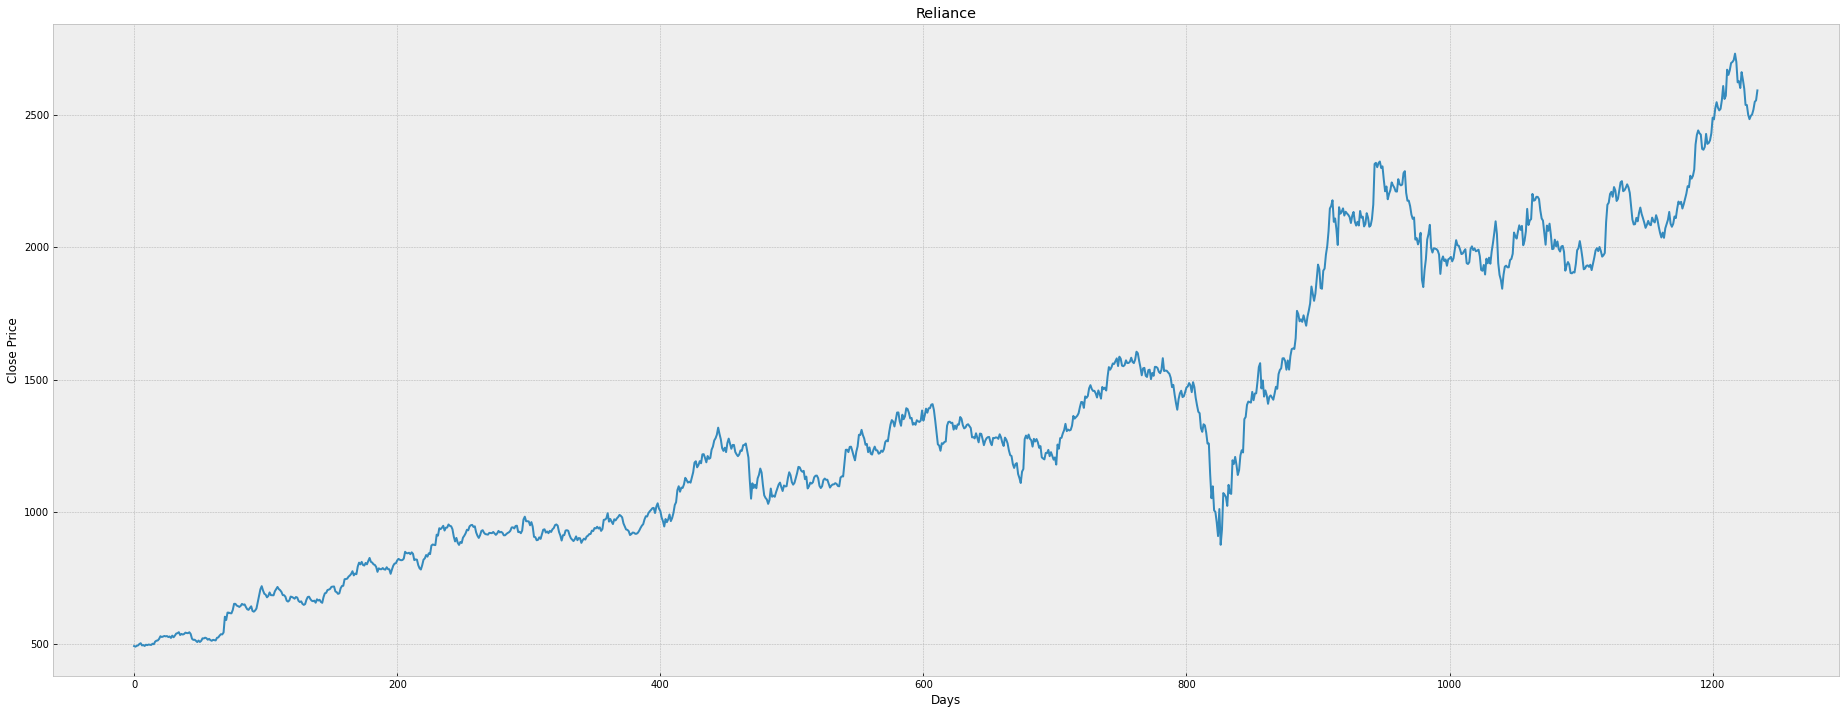

In [72]:
#Visualaizing Close Price
plt.figure(figsize=(32,12))
plt.title('Reliance')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [73]:
#get close price
df = df[['Close']]
df.head(4)

,Close
0,492.924988
1,490.649994
2,493.750000
3,495.450012


In [74]:
#creating variable to predict 'x' days out into future
future_days = 25
#creating new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,492.924988,530.724976
1,490.649994,526.974976
2,493.750000,529.075012
3,495.450012,523.549988


In [75]:
#create feature data set (x) & convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 492.924988]
 [ 490.649994]
 [ 493.75    ]
 ...
 [2555.850098]
 [2609.100098]
 [2560.199951]]


In [76]:
#create data set 'y' & convert it to a numpy aaray & get all of target values except last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 530.724976  526.974976  529.075012 ... 2549.399902 2554.949951
 2592.5     ]


In [77]:
#split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.65)

In [78]:
#create models
#create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [79]:
#get last 'x' rows of future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2269.75    ],
       [2293.649902],
       [2388.25    ],
       [2424.550049],
       [2441.300049],
       [2430.600098],
       [2425.449951],
       [2371.550049],
       [2368.300049],
       [2378.949951],
       [2428.100098],
       [2390.399902],
       [2393.899902],
       [2404.149902],
       [2430.600098],
       [2489.649902],
       [2482.949951],
       [2525.199951],
       [2548.050049],
       [2527.25    ],
       [2517.      ],
       [2522.850098],
       [2555.850098],
       [2609.100098],
       [2560.199951]])

In [80]:
#Show model tree predcition
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show model linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2572.149902 2028.699951 2731.5      2649.600098 2649.600098 2649.600098
 2649.600098 2731.5      2731.5      2731.5      2649.600098 2731.5
 2731.5      2649.600098 2649.600098 2537.350098 2537.350098 2500.899902
 2483.850098 2500.899902 2520.050049 2520.050049 2483.850098 2483.850098
 2483.850098]

[2310.78536931 2334.66506141 2429.18516499 2465.45451845 2482.19035454
 2471.49945149 2466.35365948 2412.49933557 2409.25208379 2419.89298017
 2469.0015655  2431.33324902 2434.8302894  2445.07162194 2471.49945149
 2530.49932261 2523.80503713 2566.01931028 2588.85008609 2568.06762574
 2557.8262932  2563.67144433 2596.64353933 2649.8485108  2600.98971406]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


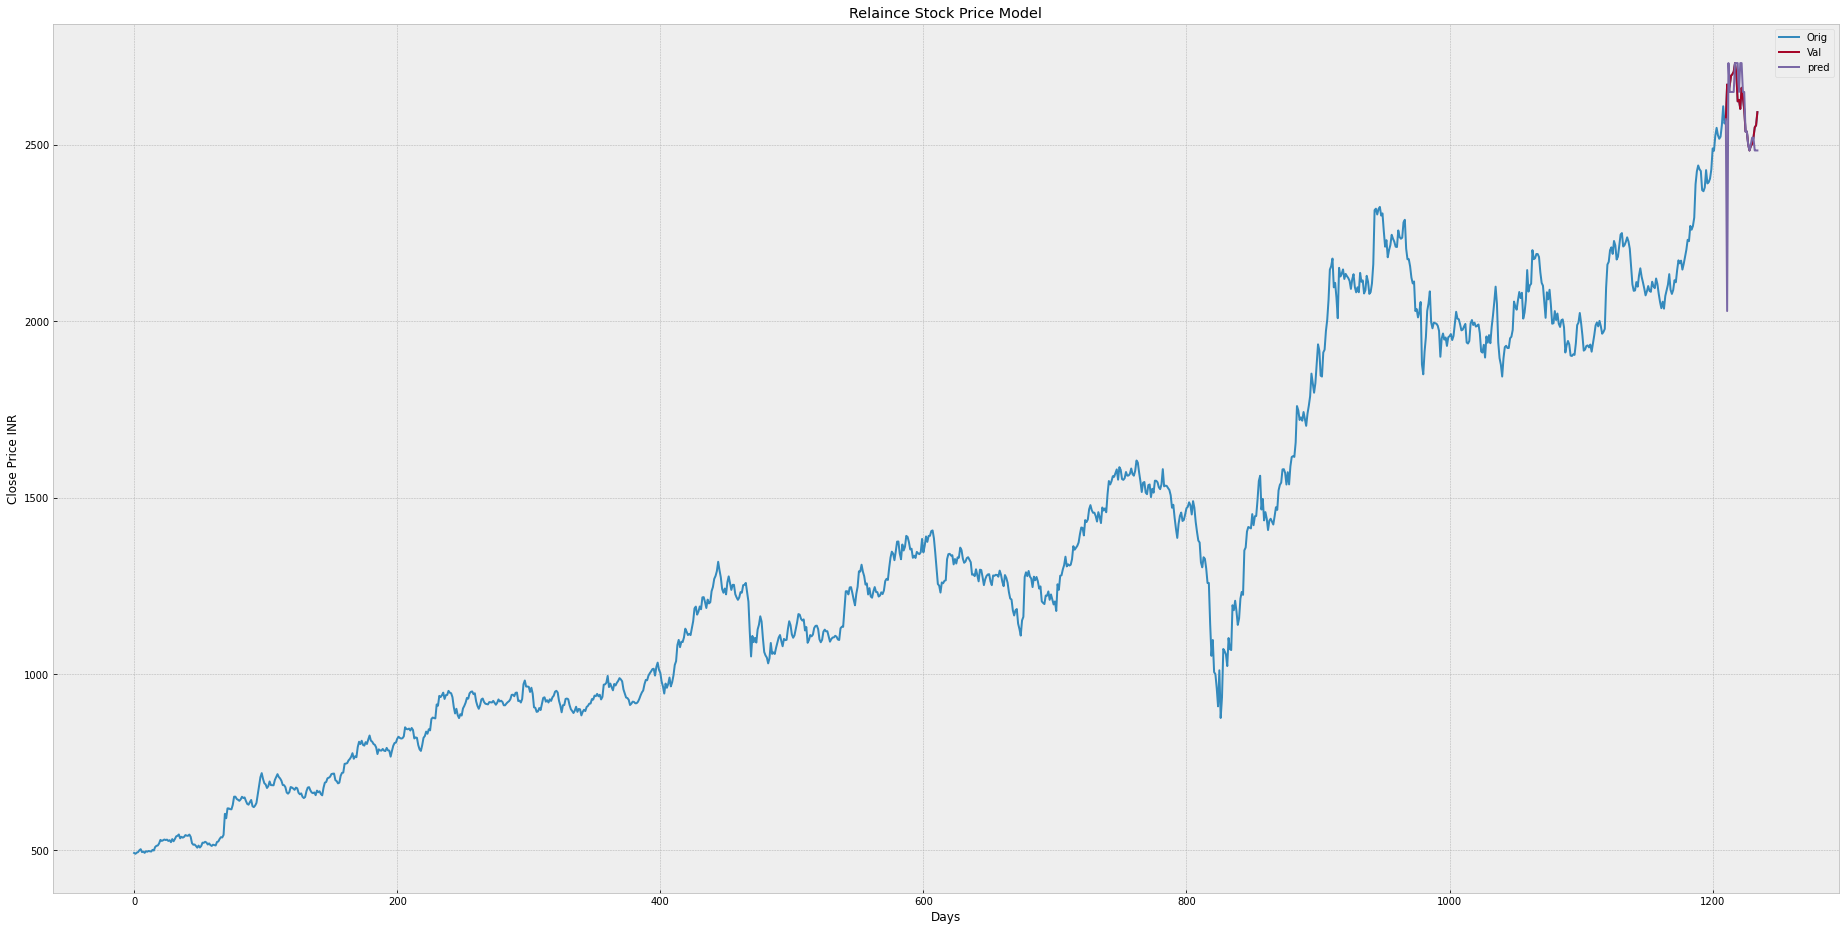

In [81]:
#Visualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(32,16))
plt.title('Relaince Stock Price Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


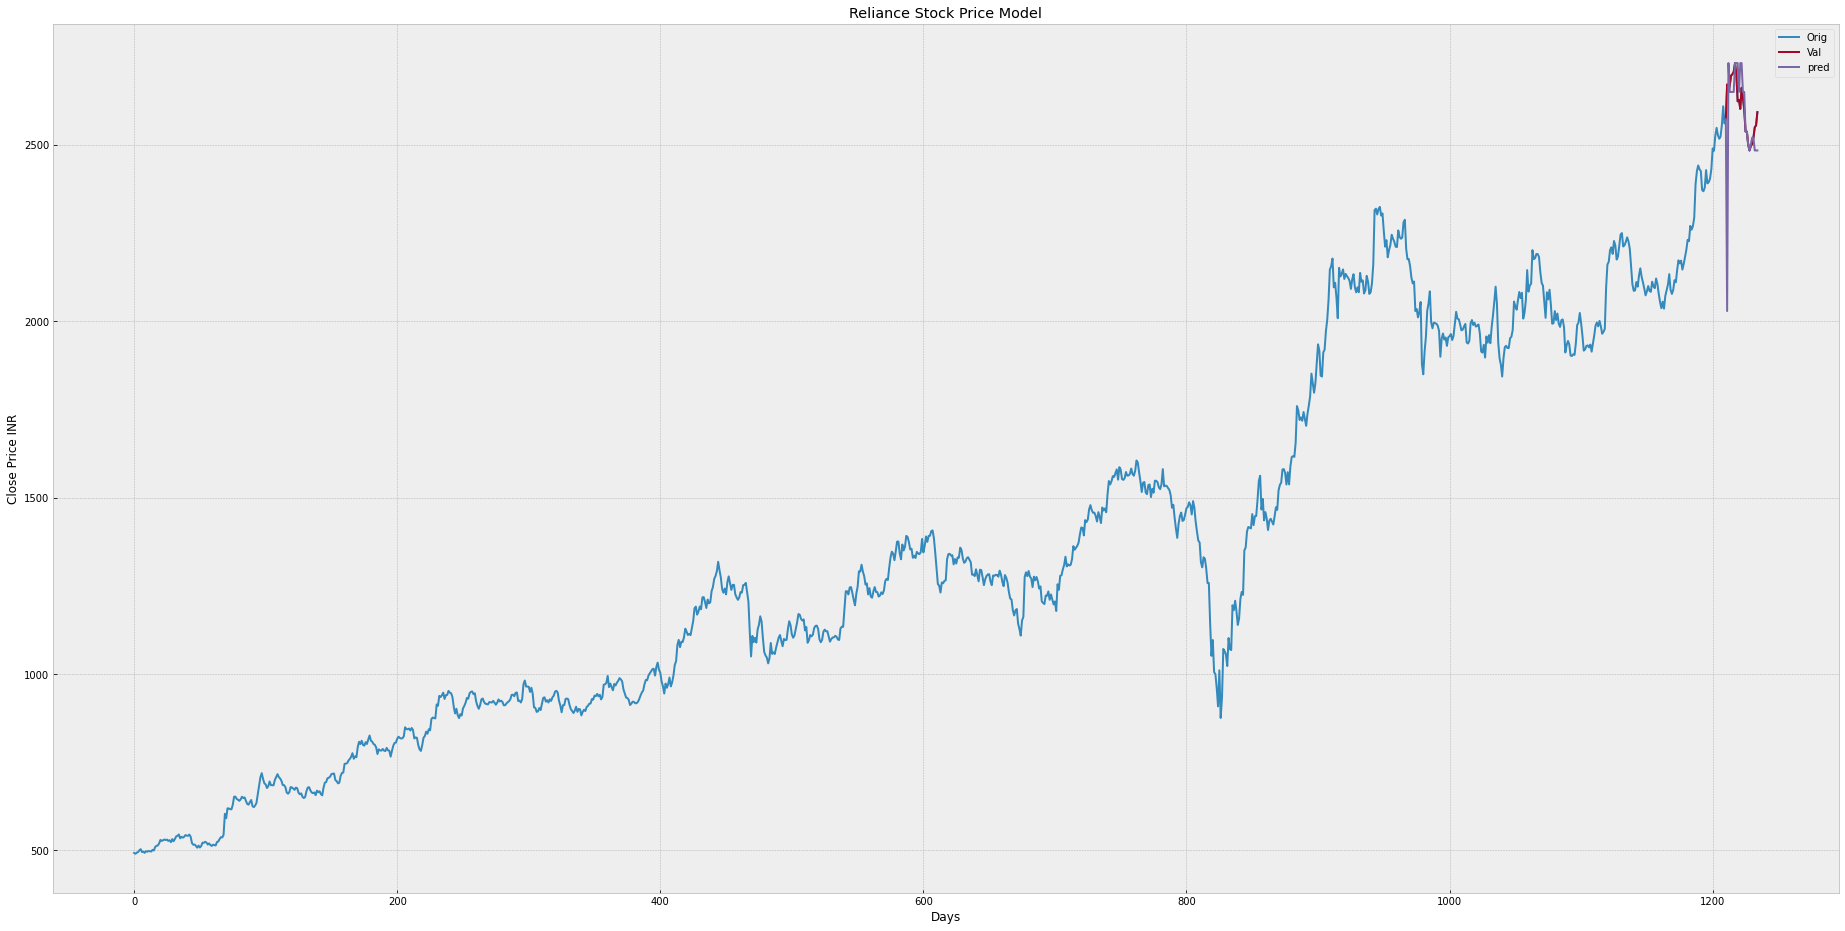

In [82]:
#Visualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(32,16))
plt.title('Reliance Stock Price Model')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Valid', 'pred'])
plt.show()